# Create face mask for COLMAP


In [1]:
import os
import random
import numpy as np
import cv2
from tqdm import tqdm

In [2]:
root_dir = "./tianyu_home"
rgb_path = os.path.join(root_dir, "rgb/ds")
deca_deform_path = os.path.join(root_dir, "deca_deform_out")
deca_canonical_path =  os.path.join(root_dir, "deca_canonical_out")

In [3]:
def get_2D_points(image_id,height,width,crop_size = 224):
    # vertices on image
    verts_2D_file = os.path.join(deca_deform_path, image_id,image_id+'_verts.txt')
    verts_2D = [] # load mesh to a list as [(x1,y1,z1),(x2,y2,z2),...], each correspond to a point in 3D mesh
    with open(verts_2D_file,"r") as file:
        lines = file.readlines()
        for line in lines:
            points = line.strip().split(" ")
            assert len(points) == 3
            verts_2D.append([float(points[0])*(height/2) + height/2,float(points[1])*(width/2)+width/2])
    verts_2D = np.array(verts_2D,dtype=np.float32)
    return verts_2D

In [4]:
import math
mask_dir = os.path.join(root_dir,'rgb/face_masks')
os.makedirs(mask_dir,exist_ok=True) 
for image_name in tqdm(os.listdir(rgb_path)):
    image_id = image_name.split('.')[0]
    image = cv2.imread(os.path.join(rgb_path,image_name))
    verts_2D = get_2D_points(image_id,image.shape[1],image.shape[0])
    if verts_2D is not None:
        mask = np.ones((image.shape[0],image.shape[1]))
        x0,x1,y0,y1 = math.floor(min(verts_2D[:,0])),math.ceil(max(verts_2D[:,0])),math.floor(min(verts_2D[:,1])), math.ceil(max(verts_2D[:,1]))
        mask[y0:y1,x0:x1] = 0
        mask_path = os.path.join(mask_dir,'{}.png'.format(image_name))
        cv2.imwrite(mask_path,mask*255)
                                                                                      
    else:
        print("Missing info for image",item_id)

100%|██████████| 2108/2108 [00:42<00:00, 49.94it/s]


p2_000286.png


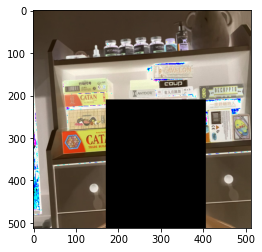

In [65]:
# place a mask on image
import random
import matplotlib.pyplot as plt
random_img = random.choice(os.listdir(rgb_path))
print(random_img)
mask = cv2.imread(os.path.join(mask_dir,'{}.png'.format(random_img)))
image = cv2.imread(os.path.join(rgb_path,random_img))
masked_image = mask * image
plt.imshow(masked_image)